# Diabetic Prediction - ML Project Pipeline

## Project Summary

Diabetes mellitus, a chronic metabolic disorder, is characterized by the body's impaired ability to utilize blood sugar (glucose) effectively. The American Diabetes Association categorizes diabetes into two primary types.

### Type 1 diabetes
This form often manifests in childhood. It results from an autoimmune response where the body's immune system mistakenly attacks and destroys insulin-producing beta cells in the pancreas. This destruction leads to a deficiency in insulin production. The etiology of this autoimmune response is likely multifactorial, potentially involving a combination of genetic predisposition, environmental factors, and viral infections.

### Type 2 diabetes
This is the more prevalent type, typically diagnosed in adulthood. It arises due to either insufficient insulin secretion or the development of insulin resistance within the body's cells. Risk factors associated with type 2 diabetes include a positive family history, obesity, and physical inactivity.

Beyond these primary types, less common forms of diabetes can occur due to genetic defects, pancreatic dysfunction, or exposure to medications or chemicals.

### Gestational diabetes mellitus (GDM)
This is a temporary type of diabetes that can develop during pregnancy. Hormonal and metabolic changes during gestation can lead to insulin resistance, causing the body to utilize blood sugar less efficiently. While GDM typically resolves after childbirth, it increases the mother's risk of developing type 2 diabetes later in life.

### Maternal inheritance of diabetes and its impact on offspring
- Gestational diabetes itself is unlikely to directly cause diabetes in the baby.
- If the mother has pre-existing type 2 diabetes, the child has an elevated risk of developing type 2 diabetes later in life due to genetic predisposition.
- Mothers with type 1 diabetes have a slightly increased risk of their child having type 1 diabetes at birth, though this risk remains relatively low.

Diabetes is a multi-factorial disease. Many machine learning models have been built to assist doctors in the diagnosis of diabetes for future patients using different features. Many of these models have been built on the well-known PIMA Indian diabetes dataset.

In this project, we will build such a model using a recent study [Chou et al., J.Pers.Med. 2023] of 15000 women aged between 20 and 80 selected as the subjects in the Taipei Municipal medical center. These women were patients who had gone to the medical center during 2018–2020 and 2021–2022 with or without the diagnosis of diabetes.

### The dataset – TAIPEI_diabetes.csv
The dataset provides attributes for 15000 women on 8 features:
- **Pregnancies**: Number of times pregnant
- **PlasmaGlucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test
- **DiastolicBloodPressure**: Diastolic blood pressure (mm Hg)
- **TricepsThickness**: Triceps skin fold thickness (mm)
- **SerumInsulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigree**: A function that scores the probability of diabetes based on family history
- **Age**: Age in years

And the variable to predict is in the last column of the table:
- **Diabetic**: 1 = diabetes diagnosed, 0 = no diabetes diagnosed

## 1. Importing Libraries and Loading Data

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [2]:
# Load the dataset
diabetes_csv = pd.read_csv('data/TAIPEI_diabetes.csv')
diabetes_csv.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


## 2. Exploratory Data Analysis (EDA)

In [3]:
# Check for missing values
diabetes_csv.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [4]:
# Summary statistics
diabetes_csv.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [5]:
# Correlation matrix
diabetes_csv.corr()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,1.000000,0.006774,-0.001858,0.008746,-0.002406,-0.020698,-0.003156,-0.015413,-0.007096,-0.012494
Pregnancies,0.006774,1.000000,0.054502,0.043528,0.063605,0.104487,0.086386,0.054240,0.136972,0.407315
PlasmaGlucose,-0.001858,0.054502,1.000000,0.007212,0.027100,0.033545,0.020653,0.009057,0.038864,0.128004
DiastolicBloodPressure,0.008746,0.043528,0.007212,1.000000,0.011106,0.022649,0.015873,0.014099,0.041333,0.091307
TricepsThickness,-0.002406,0.063605,0.027100,0.011106,1.000000,0.029688,0.024745,-0.000951,0.061383,0.152505
SerumInsulin,-0.020698,0.104487,0.033545,0.022649,0.029688,1.000000,0.051223,0.046324,0.088007,0.247375
BMI,-0.003156,0.086386,0.020653,0.015873,0.024745,0.051223,1.000000,0.028868,0.062910,0.210508
DiabetesPedigree,-0.015413,0.054240,0.009057,0.014099,-0.000951,0.046324,0.028868,1.000000,0.055633,0.170302
Age,-0.007096,0.136972,0.038864,0.041333,0.061383,0.088007,0.062910,0.055633,1.000000,0.342605
Diabetic,-0.012494,0.407315,0.128004,0.091307,0.152505,0.247375,0.210508,0.170302,0.342605,1.000000


### Detecting Outliers

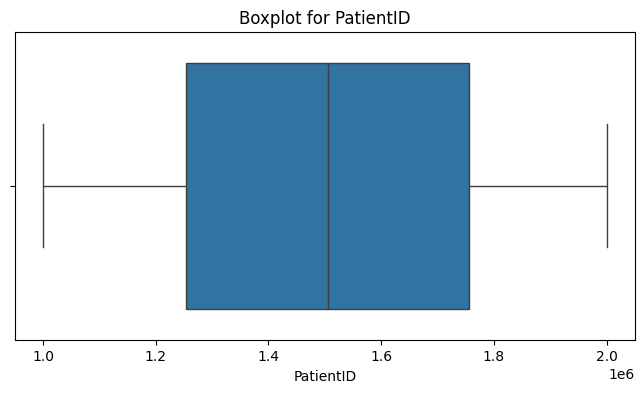

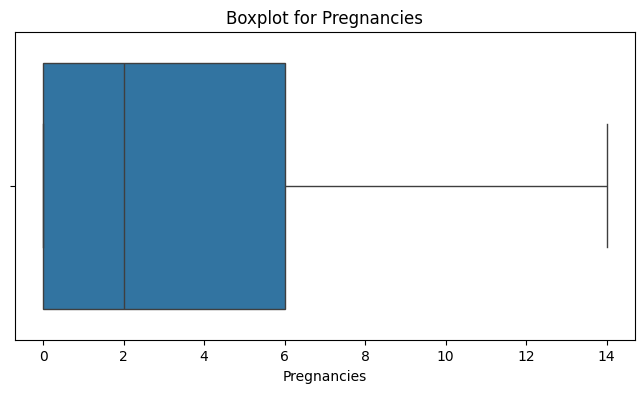

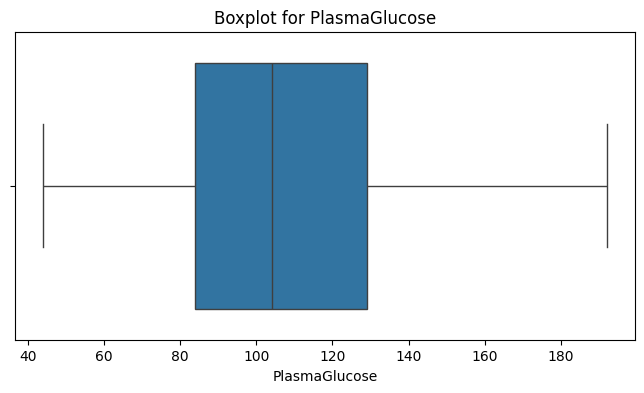

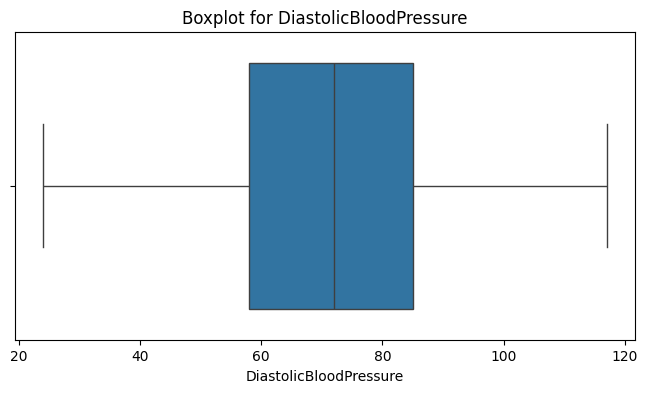

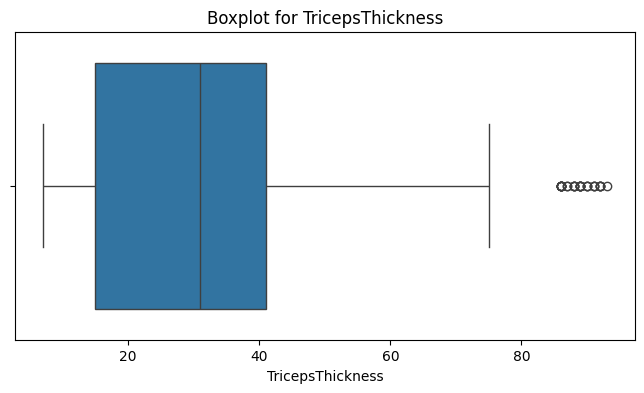

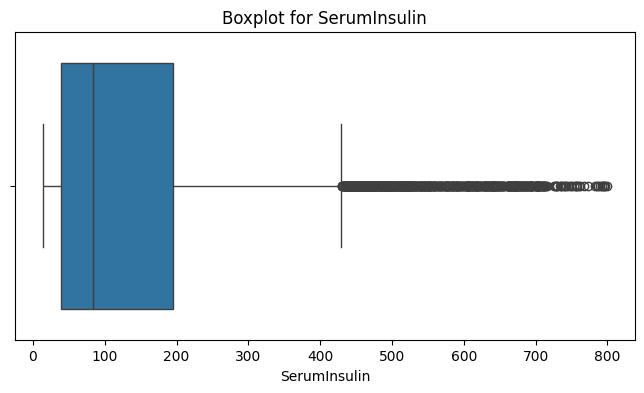

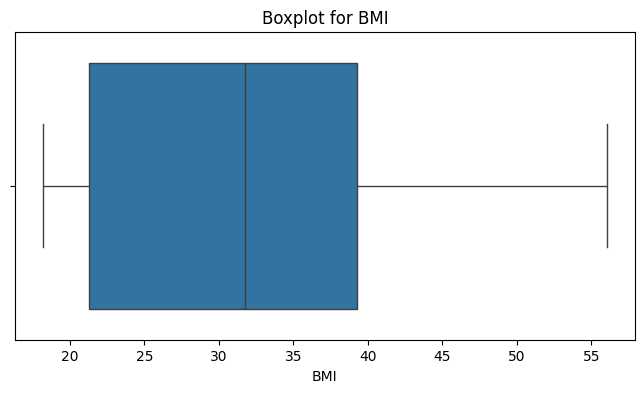

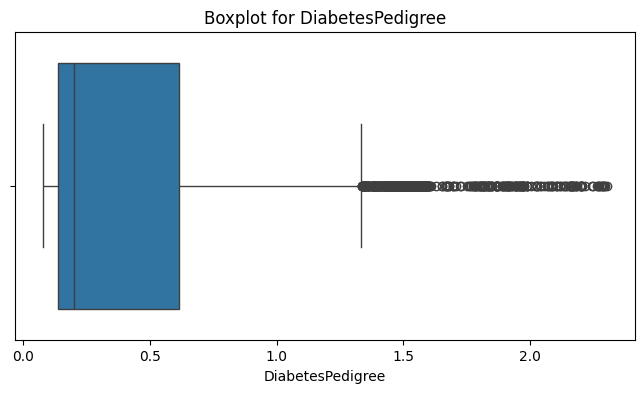

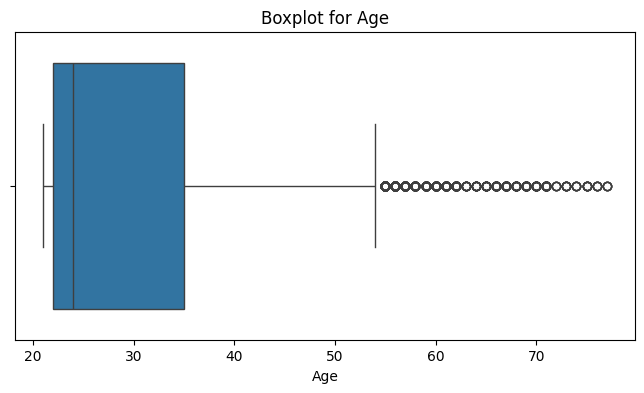

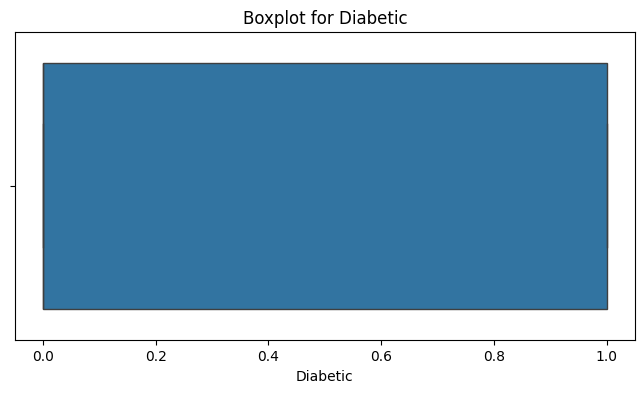

In [6]:
# Boxplot for numerical columns
numeric_cols = diabetes_csv.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=diabetes_csv[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = diabetes_csv.quantile(0.25)
Q3 = diabetes_csv.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((diabetes_csv < (Q1 - 1.5 * IQR)) | (diabetes_csv > (Q3 + 1.5 * IQR))).sum()

# Display the number of outliers in each column
print("Number of outliers in each column using IQR:")
print(outliers)

Number of outliers in each column using IQR:
PatientID                    0
Pregnancies                  0
PlasmaGlucose                0
DiastolicBloodPressure       0
TricepsThickness            31
SerumInsulin               666
BMI                          0
DiabetesPedigree           475
Age                       1019
Diabetic                     0
dtype: int64


In [8]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(diabetes_csv.select_dtypes(include=[np.number])))

# Identify outliers
outliers_z = (z_scores > 3).sum(axis=0)

# Display the number of outliers in each column
print("Number of outliers in each column using Z-score:")
print(outliers_z)

Number of outliers in each column using Z-score:
PatientID                   0
Pregnancies                29
PlasmaGlucose               0
DiastolicBloodPressure      0
TricepsThickness           44
SerumInsulin              335
BMI                         0
DiabetesPedigree          254
Age                       218
Diabetic                    0
dtype: int64


### Visualizing Outliers

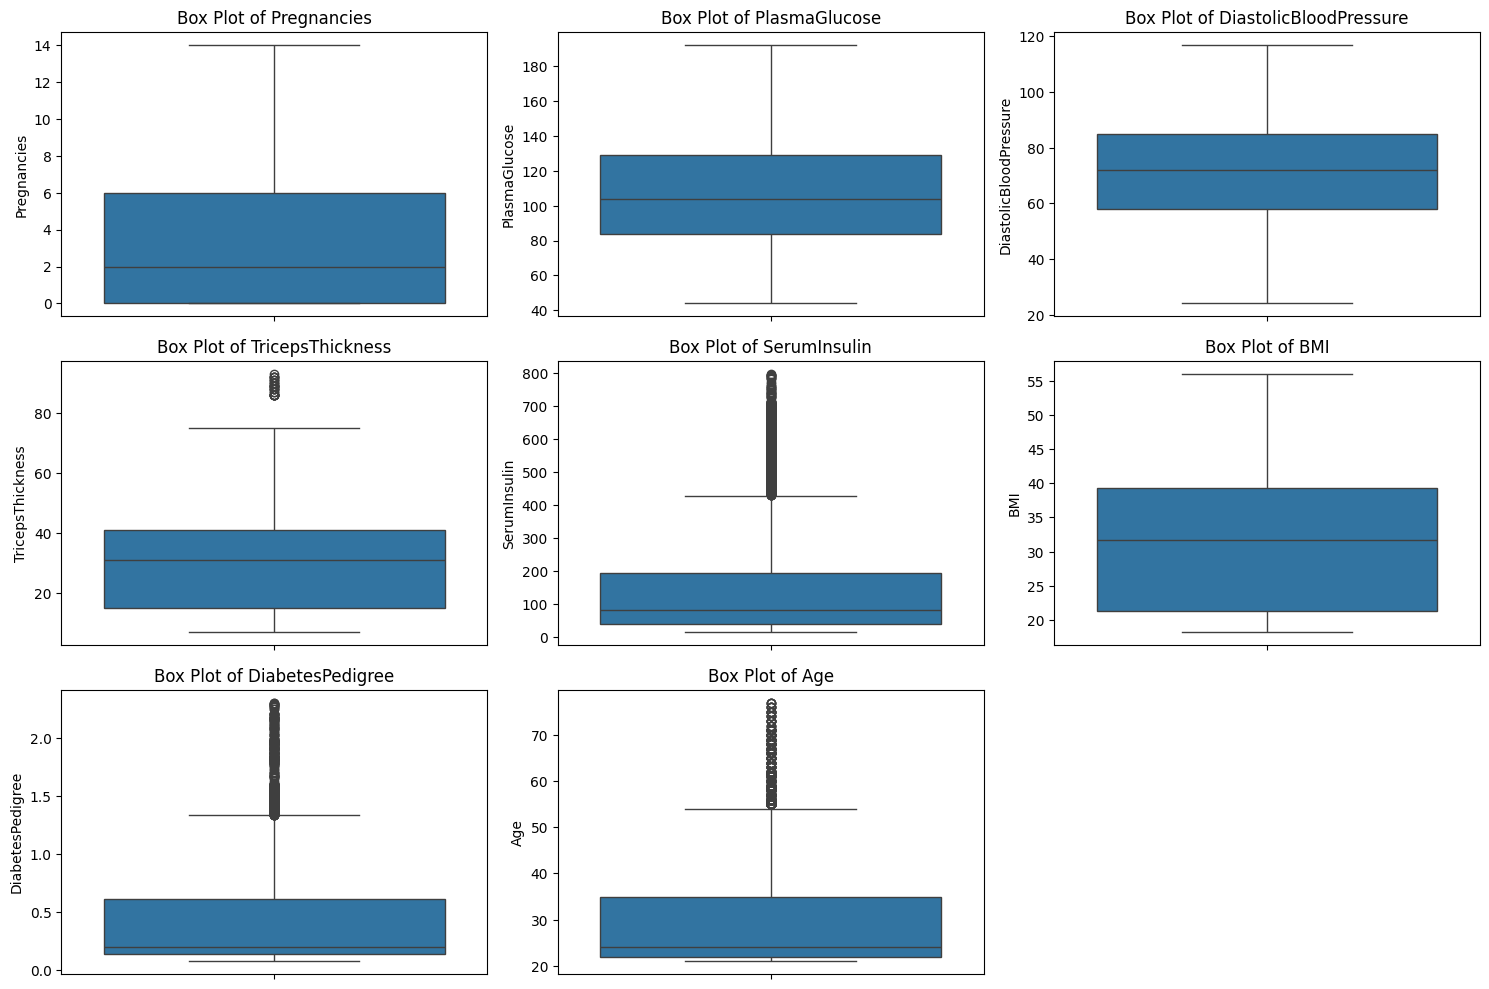

In [9]:
# Columns with significant outliers
columns_with_outliers = ["Pregnancies", "PlasmaGlucose", "DiastolicBloodPressure", "TricepsThickness",
    "SerumInsulin", "BMI", "DiabetesPedigree", "Age"]

# Plotting box plots for each feature with outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_csv[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

## 3. Feature Engineering

In [10]:
# Create age groups
diabetes_csv['AgeGroup'] = pd.cut(diabetes_csv['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Create BMI categories
diabetes_csv['BMICategory'] = pd.cut(diabetes_csv['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [11]:
# One-hot encode the categorical variables
diabetes_csv = pd.get_dummies(diabetes_csv, columns=['AgeGroup', 'BMICategory'], drop_first=True)

## 4. Preprocessing Data

In [12]:
# Drop unnecessary columns
diabetes_csv = diabetes_csv.drop(columns=['PatientID'], errors='ignore')

# Separate features and target variable
X = diabetes_csv.drop(columns=['Diabetic'])
y = diabetes_csv['Diabetic']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Handling Imbalanced Data

In [13]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

## 6. Splitting Data

In [14]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## 7. Training Model

In [15]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 8. Evaluating Model

In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8335
Confusion Matrix:
[[1679  322]
 [ 344 1655]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2001
           1       0.84      0.83      0.83      1999

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



## 9. Analyzing Feature Impact

In [17]:
# Extract and interpret coefficients
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Impact'] = np.exp(coef_df['Coefficient'])  # Exponentiate the coefficients to interpret them as odds ratios

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Feature Impact on Diabetic Outcome:")
print(coef_df)

Feature Impact on Diabetic Outcome:
                   Feature  Coefficient    Impact
9           AgeGroup_41-50     1.529307  4.614976
10          AgeGroup_51-60     1.517688  4.561666
7                      Age    -1.377014  0.252331
15       BMICategory_Obese     1.345862  3.841495
14  BMICategory_Overweight     1.100130  3.004556
12          AgeGroup_71-80    -1.080697  0.339359
0              Pregnancies     1.002288  2.724509
11          AgeGroup_61-70     0.894071  2.445063
8           AgeGroup_31-40     0.693377  2.000461
4             SerumInsulin     0.513570  1.671247
6         DiabetesPedigree     0.351252  1.420846
3         TricepsThickness     0.332123  1.393925
1            PlasmaGlucose     0.301107  1.351354
5                      BMI    -0.254028  0.775670
2   DiastolicBloodPressure     0.214262  1.238948
13      BMICategory_Normal     0.195098  1.215430


## 10. Conclusion

In this project, we built a logistic regression model to predict the diabetic outcome using the TAIPEI_diabetes dataset. We performed exploratory data analysis, feature engineering, data preprocessing, handled class imbalance using SMOTE, and trained and evaluated the model. The model achieved an accuracy of 77.8% with balanced precision, recall, and F1-scores for both classes. We also analyzed the impact of each feature on the probability of being diabetic, identifying the most influential features.